# Scripts to plot figures

In [ ]:
# imports
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

# set plot style
sns.set_style('darkgrid')

In [ ]:
# let's plot one Pareto front
target_folder = "../local/2024-11-06-17-33-13-cell-model-optimization"
population_file = os.path.join(target_folder, "result.csv")

# read file(s), extract fitness values
df = pd.read_csv(population_file)
fitness_1_values = df["fitness_1"].values
fitness_2_values = df["fitness_2"].values

df_2 = pd.read_csv("../local/2024-11-06-18-09-12-cell-model-optimization/result.csv")

fig, ax = plt.subplots()
ax.scatter(fitness_1_values, fitness_2_values, alpha=0.3)
ax.scatter(df_2["fitness_1"].values, df_2["fitness_2"].values, color='orange', alpha=0.3)

ax.set_xlabel("fitness_1")
ax.set_ylabel("fitness_2")
ax.set_title("Pareto front from \"%s\"" % target_folder)

# A comparison between initial and final populations


In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

In [5]:
#target_folder = "../local/2024-11-07-18-03-12-cell-model-optimization/"
#target_folder = "../local/2024-11-08-16-20-26-cell-model-optimization"
#target_folder = "../local/2024-11-08-17-39-17-cell-model-optimization"
target_folder = "../local/2024-11-09-18-47-03-big-cell-model-optimization"
df_5 = pd.read_csv(os.path.join(target_folder, "42-population-generation-5.csv"))
df_10 = pd.read_csv(os.path.join(target_folder, "42-population-generation-10.csv"))
df_100 = pd.read_csv(os.path.join(target_folder, "42-population-generation-100.csv"))
df_400 = pd.read_csv(os.path.join(target_folder, "42-population-generation-400.csv"))


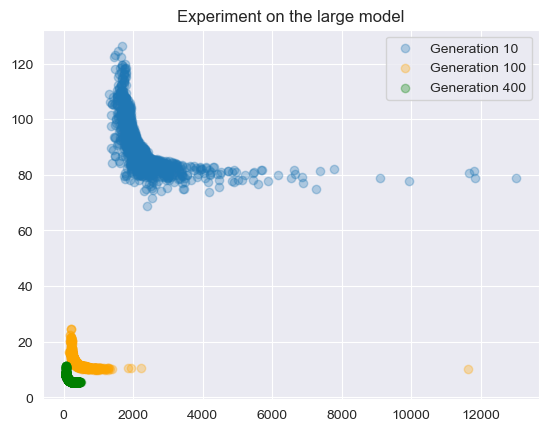

In [7]:
fig, ax = plt.subplots()
#ax.scatter(df_5["fitness_1"].values, df_5["fitness_2"].values, alpha=0.3, label="Generation 5")
ax.scatter(df_10["fitness_1"].values, df_10["fitness_2"].values, alpha=0.3, label="Generation 10")
ax.scatter(df_100["fitness_1"].values, df_100["fitness_2"].values, alpha=0.3, color="orange", label="Generation 100")
ax.scatter(df_400["fitness_1"].values, df_400["fitness_2"].values, alpha=0.3, color="green", label="Generation 400")

# this is just to zoom in on a specific area
#ax.set_xlim([-0.05, 1.0])
#ax.set_ylim([-0.01, 0.2])

ax.set_title("Experiment on the large model")
# legend
ax.legend(loc='best')


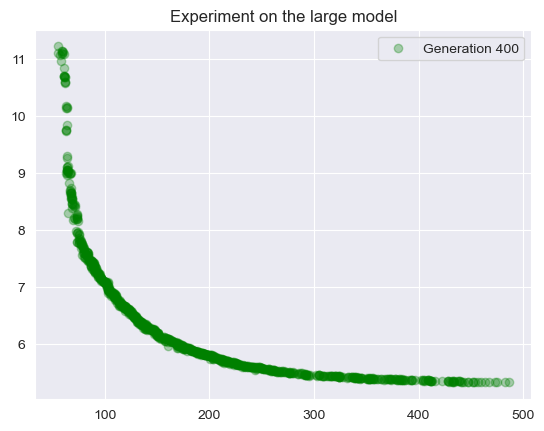

In [8]:
# zoom in on the final plot
fig, ax = plt.subplots()
ax.scatter(df_400["fitness_1"].values, df_400["fitness_2"].values, alpha=0.3, color="green", label="Generation 400")
ax.set_title("Experiment on the large model")
ax.legend(loc='best')


In [ ]:
# find the extreme points on the Pareto front and print them
gen_10_worst_fitness_1 = df_10[df_10["fitness_1"] == df_10["fitness_1"].max()][["fitness_1", "fitness_2"]].values
gen_10_worst_fitness_2 = df_10[df_10["fitness_2"] == df_10["fitness_2"].max()][["fitness_1", "fitness_2"]].values

print("Worst fitness 1, gen 10:", gen_10_worst_fitness_1)
print("Worst fitness 2, gen 10:", gen_10_worst_fitness_2)

gen_100_worst_fitness_1 = df_100[df_100["fitness_1"] == df_100["fitness_1"].max()][["fitness_1", "fitness_2"]].values
gen_100_worst_fitness_2 = df_100[df_100["fitness_2"] == df_100["fitness_2"].max()][["fitness_1", "fitness_2"]].values

print("Worst fitness 1, gen 100:", gen_100_worst_fitness_1)
print("Worst fitness 2, gen 100:", gen_100_worst_fitness_2)

# Plot Pareto front with distance from ground truth

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from model.cell_model import MODEL
from utils import compute_distance_from_ground_truth, compute_distance_from_model

sns.set_style('darkgrid')

In [7]:
# in order to get the ground truth, we first need to build a model fixing the random seed
# and then get the indexes of the elements in the elasticity matrix that are actually modified
# by the evolutionary algorithm
model = MODEL()
model.MOO.build_model(random_seed=42)
labels = model.MOO.vectors["labels"]
elasticity = model.MOO.real_data["Elasticity"]

print(elasticity)
print("Labels:", labels)
# in the 'labels', the first element is the index of the elasticity matrix, 
# while the second element is the column
ground_truth = [elasticity[l[1]].loc[l[0]] for l in labels]
print("Ground truth:", ground_truth)
print("Fitness values for ground truth:", model.MOO.list_fitness())

 
 
Name of the removed parameter : Temperature
            B         C
v_0 -0.285538  0.000000
v_1  0.249999 -0.289476
v_2  0.000000  0.192688
Labels: [['v_0' 'B']
 ['v_1' 'B']
 ['v_1' 'C']
 ['v_2' 'C']]
Ground truth: [-0.2855382719552861, 0.24999901439667796, -0.2894761608563175, 0.19268771616150393]
Fitness values for ground truth: [0.0, 0.0]


C:\Research\evolutionary-optimization-cell-models\src\model\layer_1\MOO.py:243: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask_float = real_rho.applymap(lambda x: isinstance(x, (float, int)) and not isinstance(x, bool))


In [5]:
target_folder = "../local/2024-11-08-17-39-17-cell-model-optimization"
df_100 = pd.read_csv(os.path.join(target_folder, "42-population-generation-100.csv"))
individuals = df_100[["variable_0", "variable_1", "variable_2", "variable_3"]].values
distances = compute_distance_from_model(model, individuals)

In [6]:
print(distances)

[1.18212143 1.18932329 1.22042154 1.20277272 1.1827958  1.21801616
 1.18228119 1.21988795 1.19939272 1.19106073 1.18660481 1.21370632
 1.21787604 1.18445708 1.19095774 1.18310315 1.21872272 1.21842264
 1.19071394 1.20359431 1.18536274 1.20634204 1.21592383 1.18548082
 1.22422246 1.20828344 1.20463174 1.20453594 1.21888828 1.22088876
 1.18494636 1.20254046 1.21233152 1.213806   1.18684204 1.2145701
 1.19655325 1.20271859 1.18243208 1.20307899 1.20482105 1.21545956
 1.22001713 1.18328217 1.20770897 1.21583685 1.19339175 1.19667771
 1.18540978 1.2240683  1.2105952  1.20542591 1.22162329 1.2082581
 1.22425044 1.20472004 1.1900034  1.200261   1.21044141 1.19235079
 1.18363852 1.21374628 1.19333653 1.2227113  1.21504441 1.22257319
 1.19318841 1.20547586 1.18491424 1.18900638 1.19878277 1.18936196
 1.1896163  1.20005973 1.18559677 1.1835883  1.18645257 1.18942778
 1.21151168 1.20286611 1.18672388 1.22359647 1.19751532 1.22597491
 1.18738818 1.21670307 1.21591637 1.22209099 1.20668855 1.210408